# An EDA of the Top 50 artists on Spotify

__Summary of Dataset__
1. Data taken from Kaggle: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
2. CSV file includes Top 200 and Viral 50 data from 1 January 2017 till 31 July 2021
3. Data organised into following columns:
  - Title of song
  - Rank of song in Top 200 or Viral 50
  - Date
  - Artist name
  - URL of song
  - Region (Country)
  - Chart
  - Whether the song has moved up, down etc. in chart
  - Number of streams

## Load libraries and data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image
import cufflinks as cf
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

import matplotlib.dates as mdates
from unidecode import unidecode

In [2]:
# columns of interest, so to not upload entire CSV
cols_int = ['title','rank','date','artist','region','chart','streams']

df = pd.read_csv('data/charts.csv', usecols=cols_int)
df.head()

,title,rank,date,artist,region,chart,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,153956.0


In [3]:
# Checking chart types logged
df['chart'].value_counts()

top200     20321904
viral50     5851610
Name: chart, dtype: int64

In [4]:
# Checking for how Spotify names The Netherlands
df.loc[df['region'] == 'Netherlands']

,title,rank,date,artist,region,chart,streams
5184,Energie,1,2017-01-01,"Ronnie Flex, Frenna",Netherlands,top200,112252.0
5185,Rockabye (feat. Sean Paul & Anne-Marie),2,2017-01-01,Clean Bandit,Netherlands,top200,106984.0
5186,Say You Won't Let Go,3,2017-01-01,James Arthur,Netherlands,top200,96067.0
5187,Het Is Een Feit,4,2017-01-01,"Broederliefde, Emms",Netherlands,top200,91829.0
5188,Starboy,5,2017-01-01,"The Weeknd, Daft Punk",Netherlands,top200,76076.0
...,...,...,...,...,...,...,...
26172114,Kindess (Tiguini),46,2021-07-31,O'Streaming,Netherlands,viral50,NaN
26172115,Ramenez la coupe à la maison,47,2021-07-31,Vegedream,Netherlands,viral50,NaN
26172116,Müslüm,48,2021-07-31,Hayat,Netherlands,viral50,NaN
26172117,Love Tonight,49,2021-07-31,Shouse,Netherlands,viral50,NaN


## Top 50 Most Streamed Songs in NL

__Summary__

In [5]:
# Creating Top 50 songs in NL dataframe
top50_NL = df[(df['chart'] == 'top200') & (df['rank'] <= 50) & 
              ((df['region'] == 'Netherlands'))]

In [6]:
# Check data types
top50_NL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89495 entries, 5184 to 25262351
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    89495 non-null  object 
 1   rank     89495 non-null  int64  
 2   date     89495 non-null  object 
 3   artist   89495 non-null  object 
 4   region   89495 non-null  object 
 5   chart    89495 non-null  object 
 6   streams  89495 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


In [7]:
# Convert date into datetime type
top50_NL['date'] = pd.to_datetime(top50_NL['date'])

In [8]:
# Drop Region and Chart columns
top50_NL.drop(['region','chart'],axis=1,inplace=True)
top50_NL.sample(5)

,title,rank,date,artist,streams
16357036,Ballieman,36,2020-09-18,Sevn Alias,96067.0
3642844,Liefde In De Lucht,25,2018-08-30,"Kraantje Pappie, Joshua Nolet",98999.0
2788029,Waar Zijn Die Kechs (feat. Bartofso),40,2018-08-11,Mula B,74957.0
22683769,Bad Habits,3,2021-08-11,Ed Sheeran,198167.0
15371989,Midnight Sky,26,2020-11-02,Miley Cyrus,91272.0


## Data Visualization

### Artists of Top 50 Streamed Songs [2017-2021]

In [46]:
def word_count_visual(freq):
    wc = WordCloud(width=1000, height=500,
                   max_words=100,
                   max_font_size=150,
                   colormap='rainbow',
                   prefer_horizontal=.95,
                   collocations=True,
                   background_color='white',random_state=42).generate_from_frequencies(freq)
    
    plt.figure(figsize=(10,8))
    plt.title('Artists on Spotify Top 50 Streamed Songs in NL [2017-2021]')
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

    plt.show;

In [ ]:
def wc_edit(freq,mask=None):
    wc = WordCloud(width=1000, height=500,
                   scale=3,
                   max_words=100,
                   max_font_size=150,
                   colormap='rainbow',
                   mask=mask,
                   prefer_horizontal=.95,
                   collocations=True,
                   background_color='white',random_state=42).generate_from_frequencies(freq)
    
    plt.figure(figsize=(10,8))
    plt.title('Artists on Spotify Top 50 Streamed Songs in NL [2017-2021]')
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

    plt.show;

In [8]:
# Note: This if for 2017-2021
top_artists = top50_NL['artist'].value_counts()
top_artists.head()

Ed Sheeran       2030
Dua Lipa         1362
Justin Bieber    1116
Boef             1069
The Weeknd       1012
Name: artist, dtype: int64

In [21]:
NL_mask = np.array(Image.open('data/NL-EPS-01-0001.jpg'))

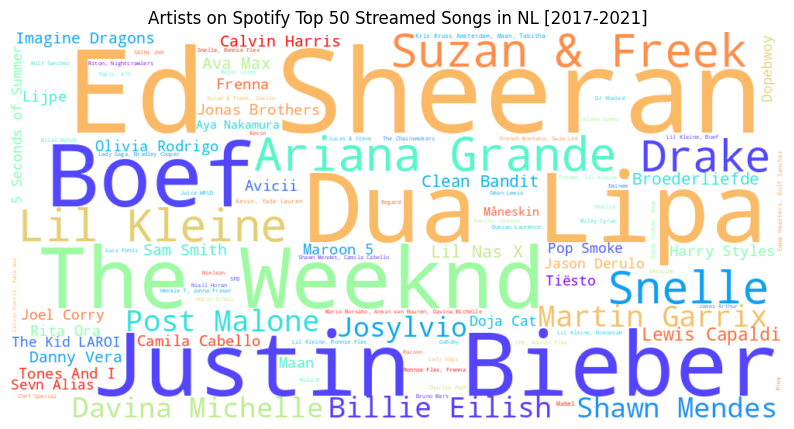

In [9]:
word_count_visual(top_artists)

In [10]:
# Number of times an artist has appeared in the Top 50 in NL
top50_NL['artist'].value_counts().head(50).iplot(kind='bar')

### Breakdown by Date

In [9]:
top50_NL['year'] = top50_NL['date'].dt.year
top50_NL['month'] = top50_NL['date'].dt.month
top50_NL['year-month'] = top50_NL['date'].dt.to_period('m')
top50_NL.head(2)

,title,rank,date,artist,streams,year,month,year-month
5184,Energie,1,2017-01-01,"Ronnie Flex, Frenna",112252.0,2017,1,2017-01
5185,Rockabye (feat. Sean Paul & Anne-Marie),2,2017-01-01,Clean Bandit,106984.0,2017,1,2017-01


In [10]:
top50_NL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89495 entries, 5184 to 25262351
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       89495 non-null  object        
 1   rank        89495 non-null  int64         
 2   date        89495 non-null  datetime64[ns]
 3   artist      89495 non-null  object        
 4   streams     89495 non-null  float64       
 5   year        89495 non-null  int64         
 6   month       89495 non-null  int64         
 7   year-month  89495 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(3), object(2), period[M](1)
memory usage: 6.1+ MB


#### Monthly Streams

In [11]:
month_streams = top50_NL.groupby(top50_NL['date'])[['streams']].sum()
month_streams.reset_index(inplace=True)
month_streams['year-month'] = month_streams['date'].dt.to_period('m')
month_streams

,date,streams,year-month
0,2017-01-01,2423858.0,2017-01
1,2017-01-02,3386047.0,2017-01
2,2017-01-03,3457137.0,2017-01
3,2017-01-04,3574480.0,2017-01
4,2017-01-05,3636208.0,2017-01
...,...,...,...
1785,2021-11-26,6614591.0,2021-11
1786,2021-11-27,6615004.0,2021-11
1787,2021-11-28,5369119.0,2021-11
1788,2021-11-29,5895370.0,2021-11


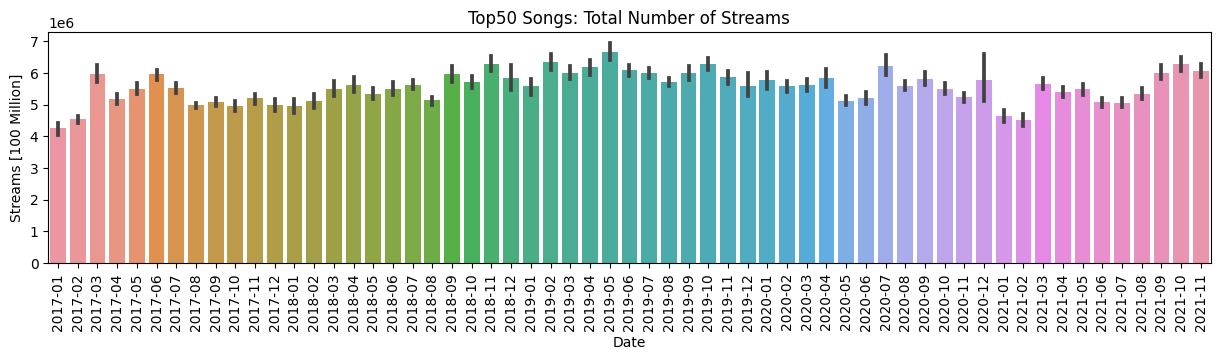

In [12]:
fig, g = plt.subplots(figsize=(15,3))

g = sns.barplot(x=month_streams['year-month'],y=month_streams['streams'])
g.set_title('Top50 Songs: Total Number of Streams')
g.set_ylabel('Streams [100 Million]')
g.set_xlabel('Date')
g.tick_params(axis='x', rotation=90)

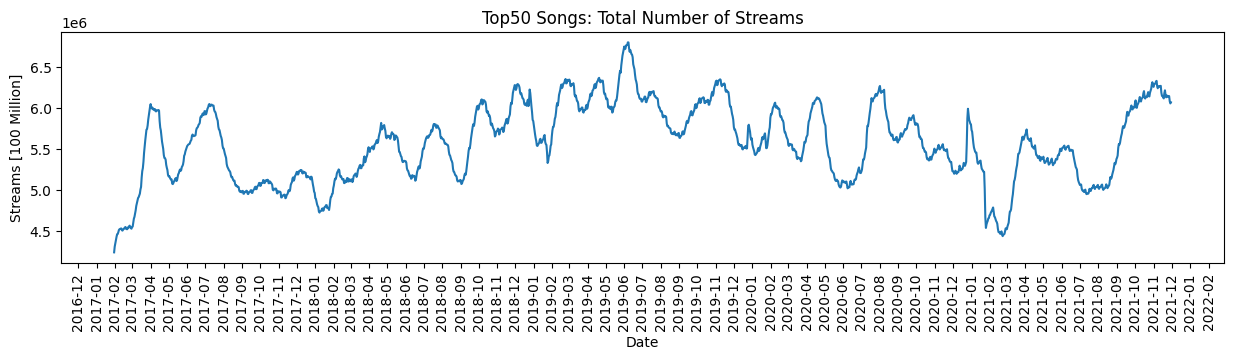

In [13]:
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(month_streams['date'], month_streams['streams'].rolling(30).mean())
ax.set_title('Top50 Songs: Total Number of Streams')
ax.set_ylabel('Streams [100 Million]')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', rotation=90)

In [14]:
# On average 10 streams = 0.03 euros
month_streams['Total_revenue'] = month_streams['streams']*0.03
month_streams['Artist_revenue'] = round(month_streams['Total_revenue']*0.3,2)
month_streams['Spotify_revenue'] = round(month_streams['Total_revenue']*0.7,2)
month_streams.sample(2)

,date,streams,year-month,Total_revenue,Artist_revenue,Spotify_revenue
205,2017-07-29,5314000.0,2017-07,159420.00,47826.00,111594.00
992,2019-09-24,5857615.0,2019-09,175728.45,52718.54,123009.91


In [21]:
# fig, ax = plt.subplots(figsize=(15,3))

# ax.plot(month_streams['date'], month_streams['Artist_revenue'].rolling(30).mean(),'b')
# ax.plot(month_streams['date'], month_streams['Spotify_revenue'].rolling(30).mean(),'r')
# ax.set_title('Top50 Songs: Total Revenue over time')
# ax.legend(['Artist Revenue','Spotify Revenue'])
# ax.set_ylabel('Revenue [Dollars]')
# ax.set_xlabel('Date')
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax.tick_params(axis='x', rotation=90)

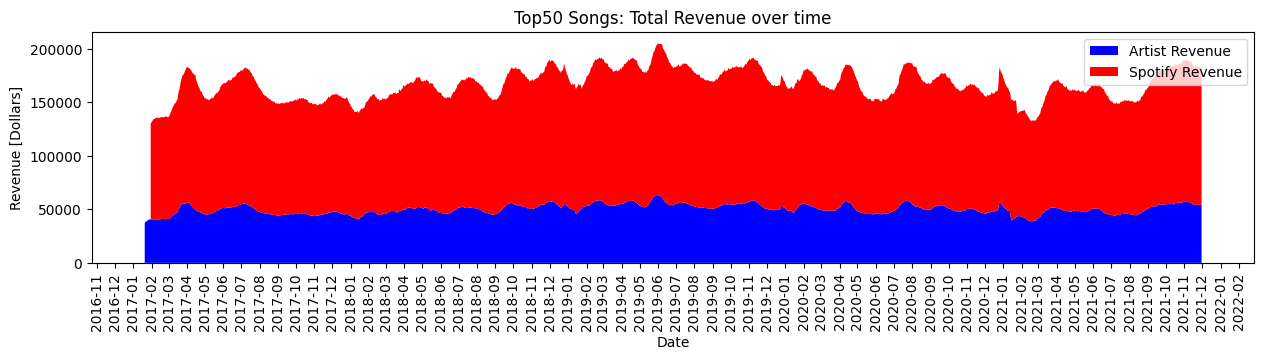

In [20]:
# Total revenue made according to Top 50 songs by artists (30%), and Spotify (70%) [2017-2021]
# Heavy assumptions: All artists own all the royalties, based on 2023 earnings calculator)

# plt.stackplot(month_streams['year-month2'],month_streams['Artist_revenue'])
fig, ax = plt.subplots(figsize=(15,3))

ax.stackplot(month_streams['date'], month_streams['Artist_revenue'].rolling(20).mean(), month_streams['Spotify_revenue'].rolling(30).mean(),
             colors=['b','r'])
ax.set_title('Top50 Songs: Total Revenue over time')
ax.legend(['Artist Revenue','Spotify Revenue'])
ax.set_ylabel('Revenue [Dollars]')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Song that was played the most

#### Days

In [29]:
days_in = top50_NL.groupby(['artist','title'])[['date']].count().reset_index()
days_in.columns = ['artist','title','Number of days in Top 50']
days_in.head(2)

,artist,title,Number of days in Top 50
0,$hirak,Beng (feat. SBMG),21
1,$hirak,"DM's (feat. Adje, 3robi & Josylvio)",8


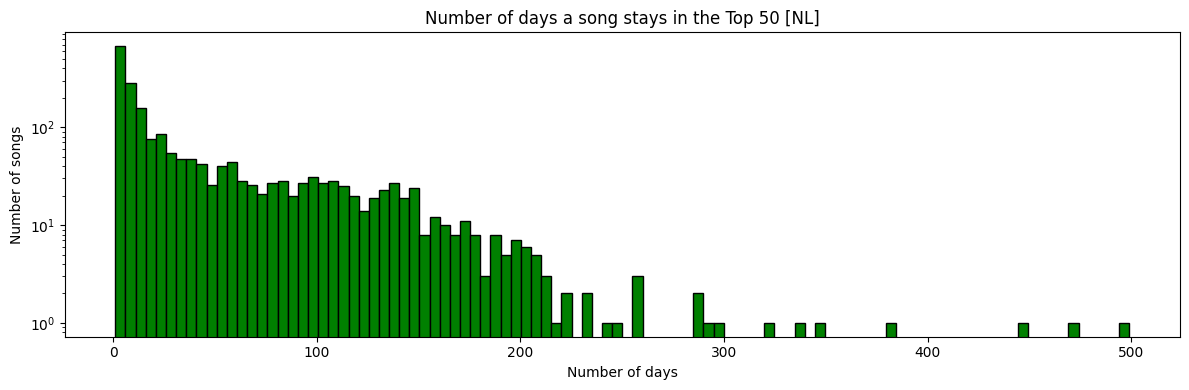

In [39]:
fig,ax = plt.subplots(figsize=(12,4))

ax.hist(days_in['Number of days in Top 50'],bins=100,color='g',edgecolor='black')
ax.set_title('Number of days a song stays in the Top 50 [NL]')
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of songs')
ax.set_yscale('log')

plt.tight_layout()

In [51]:
longest_intop = days_in.sort_values(by='Number of days in Top 50',ascending=False)
longest_intop['title'] = longest_intop['title'].apply(unidecode)
longest_intop.head()

,artist,title,Number of days in Top 50
461,Danny Vera,Roller Coaster,499
2021,The Weeknd,Blinding Lights,471
1275,Lewis Capaldi,Someone You Loved,448
614,Ed Sheeran,Shape of You,381
471,Davina Michelle,Duurt Te Lang,348


In [52]:
longest_intop_title = longest_intop['title']
longest_intop_title

461                                 Roller Coaster
2021                               Blinding Lights
1275                             Someone You Loved
614                                   Shape of You
471                                  Duurt Te Lang
                           ...                    
1629    Bout A Million (feat. 42 Dugg & 21 Savage)
1628                  Bad Bitch From Tokyo (Intro)
1626                                    44 BullDog
440                Hier Ver Vandaan (feat. Frenna)
882                                     teddiebeer
Name: title, Length: 2129, dtype: object

In [53]:
word_count_visual(longest_intop_title)

ValueError: could not convert string to float: 'you broke me first'

## Trends for a Song staying in the Top 50

In [ ]:
# Find other notebook

## Top 50 in BeNeLux: Examining the area and comparisons between countries

In [54]:
top50_benelux = df[(df['chart'] == 'top200') & (df['rank'] <= 50) & 
              ((df['region'] == 'Netherlands') | (df['region'] == 'Belgium') | (df['region'] == 'Luxembourg'))]

In [55]:
# Check for missing data
top50_benelux.isnull().sum()

title      0
rank       0
date       0
artist     0
region     0
chart      0
streams    0
dtype: int64

In [56]:
# Check data types
top50_benelux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187147 entries, 603 to 25262351
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   title    187147 non-null  object 
 1   rank     187147 non-null  int64  
 2   date     187147 non-null  object 
 3   artist   187147 non-null  object 
 4   region   187147 non-null  object 
 5   chart    187147 non-null  object 
 6   streams  187147 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.4+ MB


In [57]:
# Convert date into datetime type
top50_benelux['date'] = pd.to_datetime(top50_benelux['date'])

In [60]:
top50_benelux.drop(['chart'],axis=1,inplace=True)
top50_benelux.sample(15)

,title,rank,date,artist,region,streams
4635963,Als Het Avond Is,19,2019-05-03,Suzan & Freek,Belgium,22509.0
22964963,Woman,12,2021-10-15,Doja Cat,Belgium,39005.0
11383690,Westside,35,2017-05-08,"Josylvio, 3robi, Killer Kamal",Netherlands,70163.0
927033,Issues,26,2017-02-16,Julia Michaels,Netherlands,75111.0
9445431,Wat Is Je Naam,3,2020-03-10,"Yxng Le, Frenna",Netherlands,175494.0
5080875,Electricity (with Dua Lipa),16,2018-10-18,"Silk City, Diplo, Mark Ronson",Netherlands,123629.0
24634057,New Rules,13,2017-12-27,Dua Lipa,Netherlands,83787.0
20817083,Run,34,2021-06-27,OneRepublic,Netherlands,59200.0
15285173,Alles Komt Goed,47,2021-07-09,Jaap Reesema,Belgium,16964.0
1542113,In the Name of Love,26,2017-01-25,"Martin Garrix, Bebe Rexha",Belgium,12304.0
